In [103]:
import planetengine
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp

In [21]:
reader = planetengine.Reader('iso', 'workspace/tests_190313')

In [23]:
reader['*', 'inputs']

{'eaqaiblii-keeflkey/freq': 6.0,
 'eaqaiblii-keeflkey/pert': 0.2,
 'eaqaiblii-keeflkey/phase': 0.0,
 'raagteust-puosmkleis/aspectKey': 'aspect',
 'raagteust-puosmkleis/diffKey': 'diffusivityFn',
 'raagteust-puosmkleis/fluxKey': 'flux',
 'raagteust-puosmkleis/heatingKey': 'heatingFn',
 'raagteust-puosmkleis/observee': 'sciafrtseasc-aaklskuod',
 'raagteust-puosmkleis/plasticViscKey': 'plasticViscFn',
 'raagteust-puosmkleis/pressureKey': 'pressureField',
 'raagteust-puosmkleis/tempKey': 'temperatureField',
 'raagteust-puosmkleis/vcKey': 'vc',
 'raagteust-puosmkleis/velKey': 'velocityField',
 'raagteust-puosmkleis/viscKey': 'viscosityFn',
 'sciafrtseasc-aaklskuod/H': 0.0,
 'sciafrtseasc-aaklskuod/alpha': 1000000.0,
 'sciafrtseasc-aaklskuod/aspect': 3.0,
 'sciafrtseasc-aaklskuod/courant': 1.0,
 'sciafrtseasc-aaklskuod/eta': 1.0,
 'sciafrtseasc-aaklskuod/f': 1.0,
 'sciafrtseasc-aaklskuod/flux': None,
 'sciafrtseasc-aaklskuod/innerMethod': 'lu',
 'sciafrtseasc-aaklskuod/innerTol': None,
 'sci

In [24]:
chrons = reader['raagteust-puosmkleis', 'outputs', 'chron']
Nus = reader['raagteust-puosmkleis', 'outputs', 'Nu']

In [128]:
sampleFactor = 10
ichrons = np.linspace(np.min(chrons), np.max(chrons), round(len(chrons) * sampleFactor))
iNus = sp.interpolate.interp1d(chrons, Nus, kind = 'cubic')(ichrons)

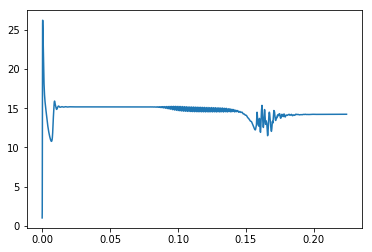

In [129]:
plt.plot(ichrons, iNus)

In [130]:
data = iNus
length = len(data)
av = np.average(data)
norm = (data - av) / av
fft = (np.fft.fft(norm) / length)[range(int(length / 2))]
values = np.arange(int(length / 2))
samplingFrequency = ichrons[1] - ichrons[0]
timePeriod = length / samplingFrequency
freqs = values / timePeriod

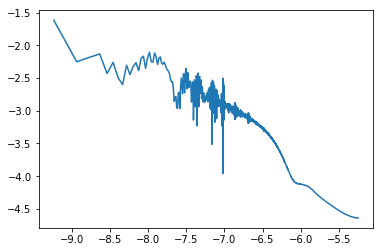

In [134]:
plt.plot(np.log10(freqs[1:]), np.log10(abs(fft)[1:]))

In [69]:
fft[1]

(0.018383961428380526-0.0029394925287629819j)

In [34]:
# data = iNus
# av = np.average(data)
# norm = (data - av) / av
# power = np.abs(np.fft.rfft(norm)).real
# freqScale = ichrons[-1] / len(iNus)
# freq = np.fft.rfftfreq(norm.size, 1. / (2. * power.size)) * freqScale

In [ ]:
# plt.plot(freq, sp)